In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [269]:
data = pd.read_csv("C:/Users/Dareen/OneDrive/Desktop/projects/customer churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [270]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [272]:
data=data.fillna(0)

### preprocessing the data

In [273]:
objects=[]
for column in data.columns:
    if data[column].dtype=="object":
        objects.append(column)
for object in objects:
    print(object)

customerID
gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
TotalCharges
Churn


In [274]:
print(len(objects))

18


In [275]:
for object in objects:
    unique=data[object].unique()
    print(f" {len(unique)} in {object} ")

 7043 in customerID 
 2 in gender 
 2 in Partner 
 2 in Dependents 
 2 in PhoneService 
 3 in MultipleLines 
 3 in InternetService 
 3 in OnlineSecurity 
 3 in OnlineBackup 
 3 in DeviceProtection 
 3 in TechSupport 
 3 in StreamingTV 
 3 in StreamingMovies 
 3 in Contract 
 2 in PaperlessBilling 
 4 in PaymentMethod 
 6531 in TotalCharges 
 2 in Churn 


In [276]:
data =data.drop("customerID",axis=1)
objects.remove("customerID")

In [277]:
binary_columns=[]
columns_3_4=[]
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
lb = LabelBinarizer()
le = LabelEncoder()  

for object in objects:
    unique_values = data[object].nunique()
    if unique_values == 2:
        data[object] = le.fit_transform(data[object])
        binary_columns.append(object)
    
    elif 2 < unique_values <= 4:
        data[object] = le.fit_transform(data[object])
        columns_3_4.append(object)

for object in objects:
    print(f"{object}: {data[object].dtype}")


gender: int32
Partner: int32
Dependents: int32
PhoneService: int32
MultipleLines: int32
InternetService: int32
OnlineSecurity: int32
OnlineBackup: int32
DeviceProtection: int32
TechSupport: int32
StreamingTV: int32
StreamingMovies: int32
Contract: int32
PaperlessBilling: int32
PaymentMethod: int32
TotalCharges: object
Churn: int32


In [278]:
print(f"{len(data['TotalCharges'].unique())}")

6531


In [279]:
data["TotalCharges"].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [280]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(0)  

In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [282]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2279.734304,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,398.550000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [283]:
correlations = data.corr()['Churn'].sort_values(ascending=False)
print("Top Features Correlated with Churn:")
print(correlations.abs().sort_values(ascending=False).head(20))

Top Features Correlated with Churn:
Churn               1.000000
Contract            0.396713
tenure              0.352229
OnlineSecurity      0.289309
TechSupport         0.282492
TotalCharges        0.198324
OnlineBackup        0.195525
MonthlyCharges      0.193356
PaperlessBilling    0.191825
DeviceProtection    0.178134
Dependents          0.164221
SeniorCitizen       0.150889
Partner             0.150448
PaymentMethod       0.107062
InternetService     0.047291
StreamingMovies     0.038492
MultipleLines       0.038037
StreamingTV         0.036581
PhoneService        0.011942
gender              0.008612
Name: Churn, dtype: float64


In [284]:
data=data.drop(["PhoneService","SeniorCitizen"],axis=1)

In [285]:
binary_columns = list(set(binary_columns) - {"PhoneService", "SeniorCitizen"})

### plotting the data

C:\Users\Dareen\AppData\Local\Temp\ipykernel_34116\816904696.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette=[palette[i]])
C:\Users\Dareen\AppData\Local\Temp\ipykernel_34116\816904696.py:8: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=data, x=col, palette=[palette[i]])
C:\Users\Dareen\AppData\Local\Temp\ipykernel_34116\816904696.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette=[palette[i]])
C:\Users\Dareen\AppData\Local\Temp\ipykernel_34116\816904696.py:8: UserWarning: 
The palette list has fewer values (1) than needed (2) and

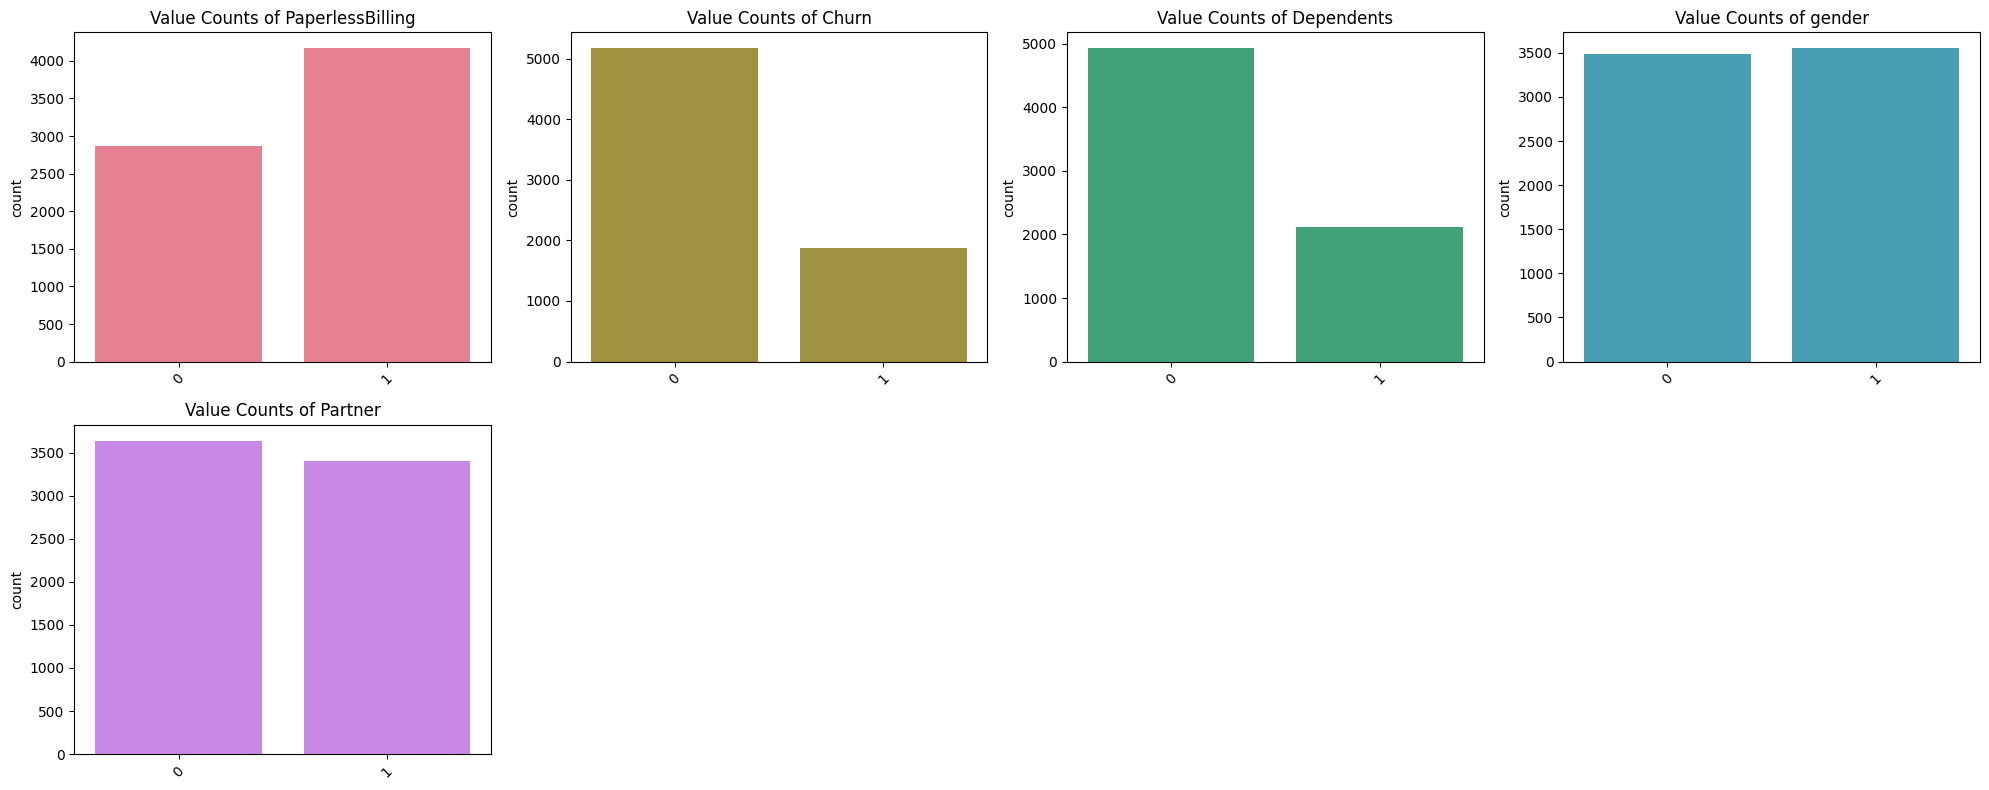

In [286]:
n_cols = 4
n_rows = int(np.ceil(len(binary_columns) / n_cols))
plt.figure(figsize=(5*n_cols, 4*n_rows))  
palette = sns.color_palette("husl", len(binary_columns))

for i, col in enumerate(binary_columns):
    plt.subplot(n_rows, n_cols, i+1)
    sns.countplot(data=data, x=col, palette=[palette[i]])
    plt.title(f'Value Counts of {col}', fontsize=12)
    plt.xticks(rotation=45)
    plt.xlabel('')

plt.tight_layout()
plt.show()

C:\Users\Dareen\AppData\Local\Temp\ipykernel_34116\2207235502.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette=[palette[i]])
C:\Users\Dareen\AppData\Local\Temp\ipykernel_34116\2207235502.py:8: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=data, x=col, palette=[palette[i]])
C:\Users\Dareen\AppData\Local\Temp\ipykernel_34116\2207235502.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette=[palette[i]])
C:\Users\Dareen\AppData\Local\Temp\ipykernel_34116\2207235502.py:8: UserWarning: 
The palette list has fewer values (1) than needed (3)

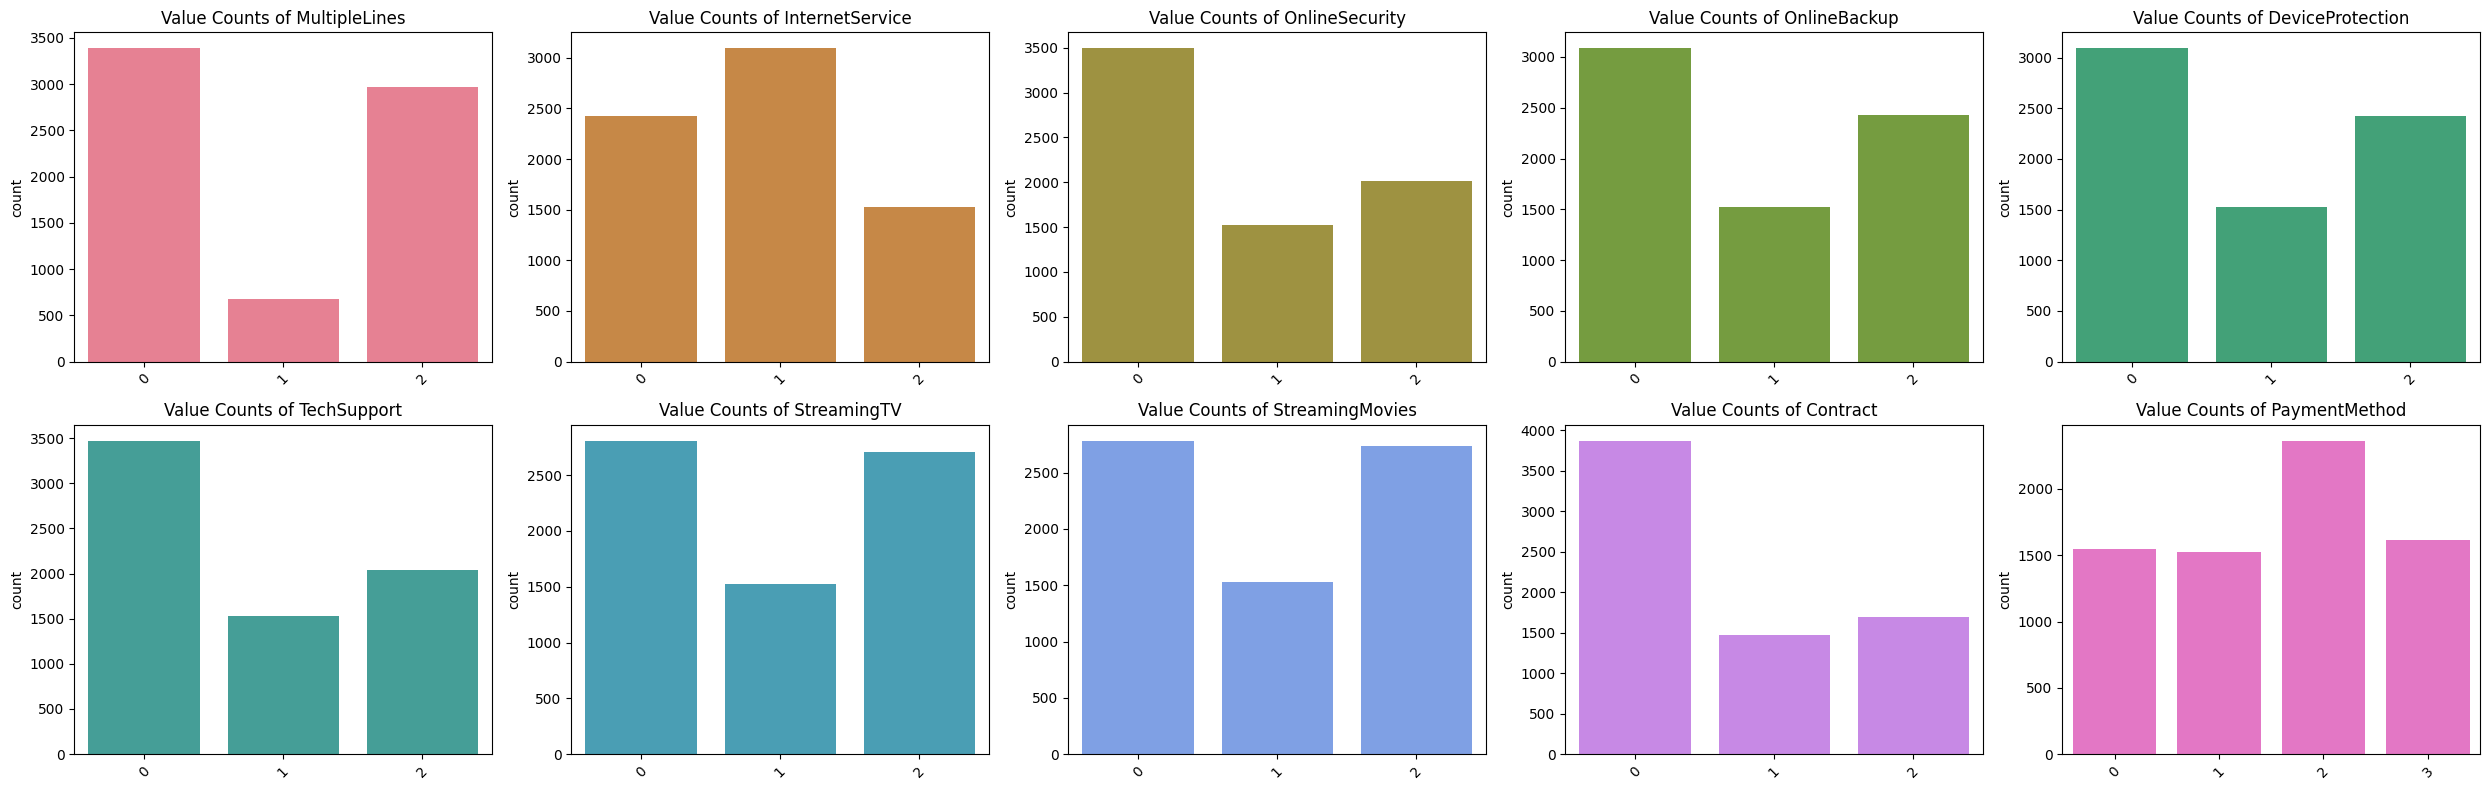

In [287]:
n_cols = 5
n_rows = int(np.ceil(len(columns_3_4) / n_cols))
plt.figure(figsize=(5*n_cols, 4*n_rows))  
palette = sns.color_palette("husl", len(columns_3_4))

for i, col in enumerate(columns_3_4):
    plt.subplot(n_rows, n_cols, i+1)
    sns.countplot(data=data, x=col, palette=[palette[i]])
    plt.title(f'Value Counts of {col}', fontsize=12)
    plt.xticks(rotation=45)
    plt.xlabel('')

plt.tight_layout()
plt.show()

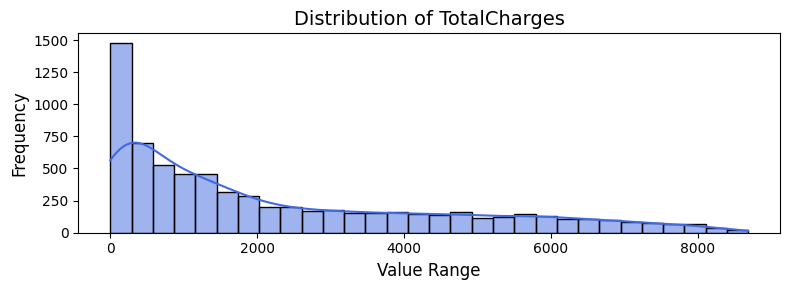

In [288]:
plt.figure(figsize=(8, 3))
sns.histplot(data=data, x="TotalCharges", kde=True, color='royalblue', bins=30)
plt.title('Distribution of TotalCharges', fontsize=14)
plt.xlabel('Value Range', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

In [289]:
X=data.drop("Churn",axis=1)
y=data["Churn"]

In [290]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [291]:
X_train_sampled, _, y_train_sampled, _ = train_test_split(
    X_train, 
    y_train,
    train_size=0.8,       
    stratify=y_train,         
    random_state=42           
)

unique, counts = np.unique(y_train_sampled, return_counts=True)
print("Sampled class distribution:", dict(zip(unique, counts)))

Sampled class distribution: {0: 3310, 1: 1197}


#### check skewness

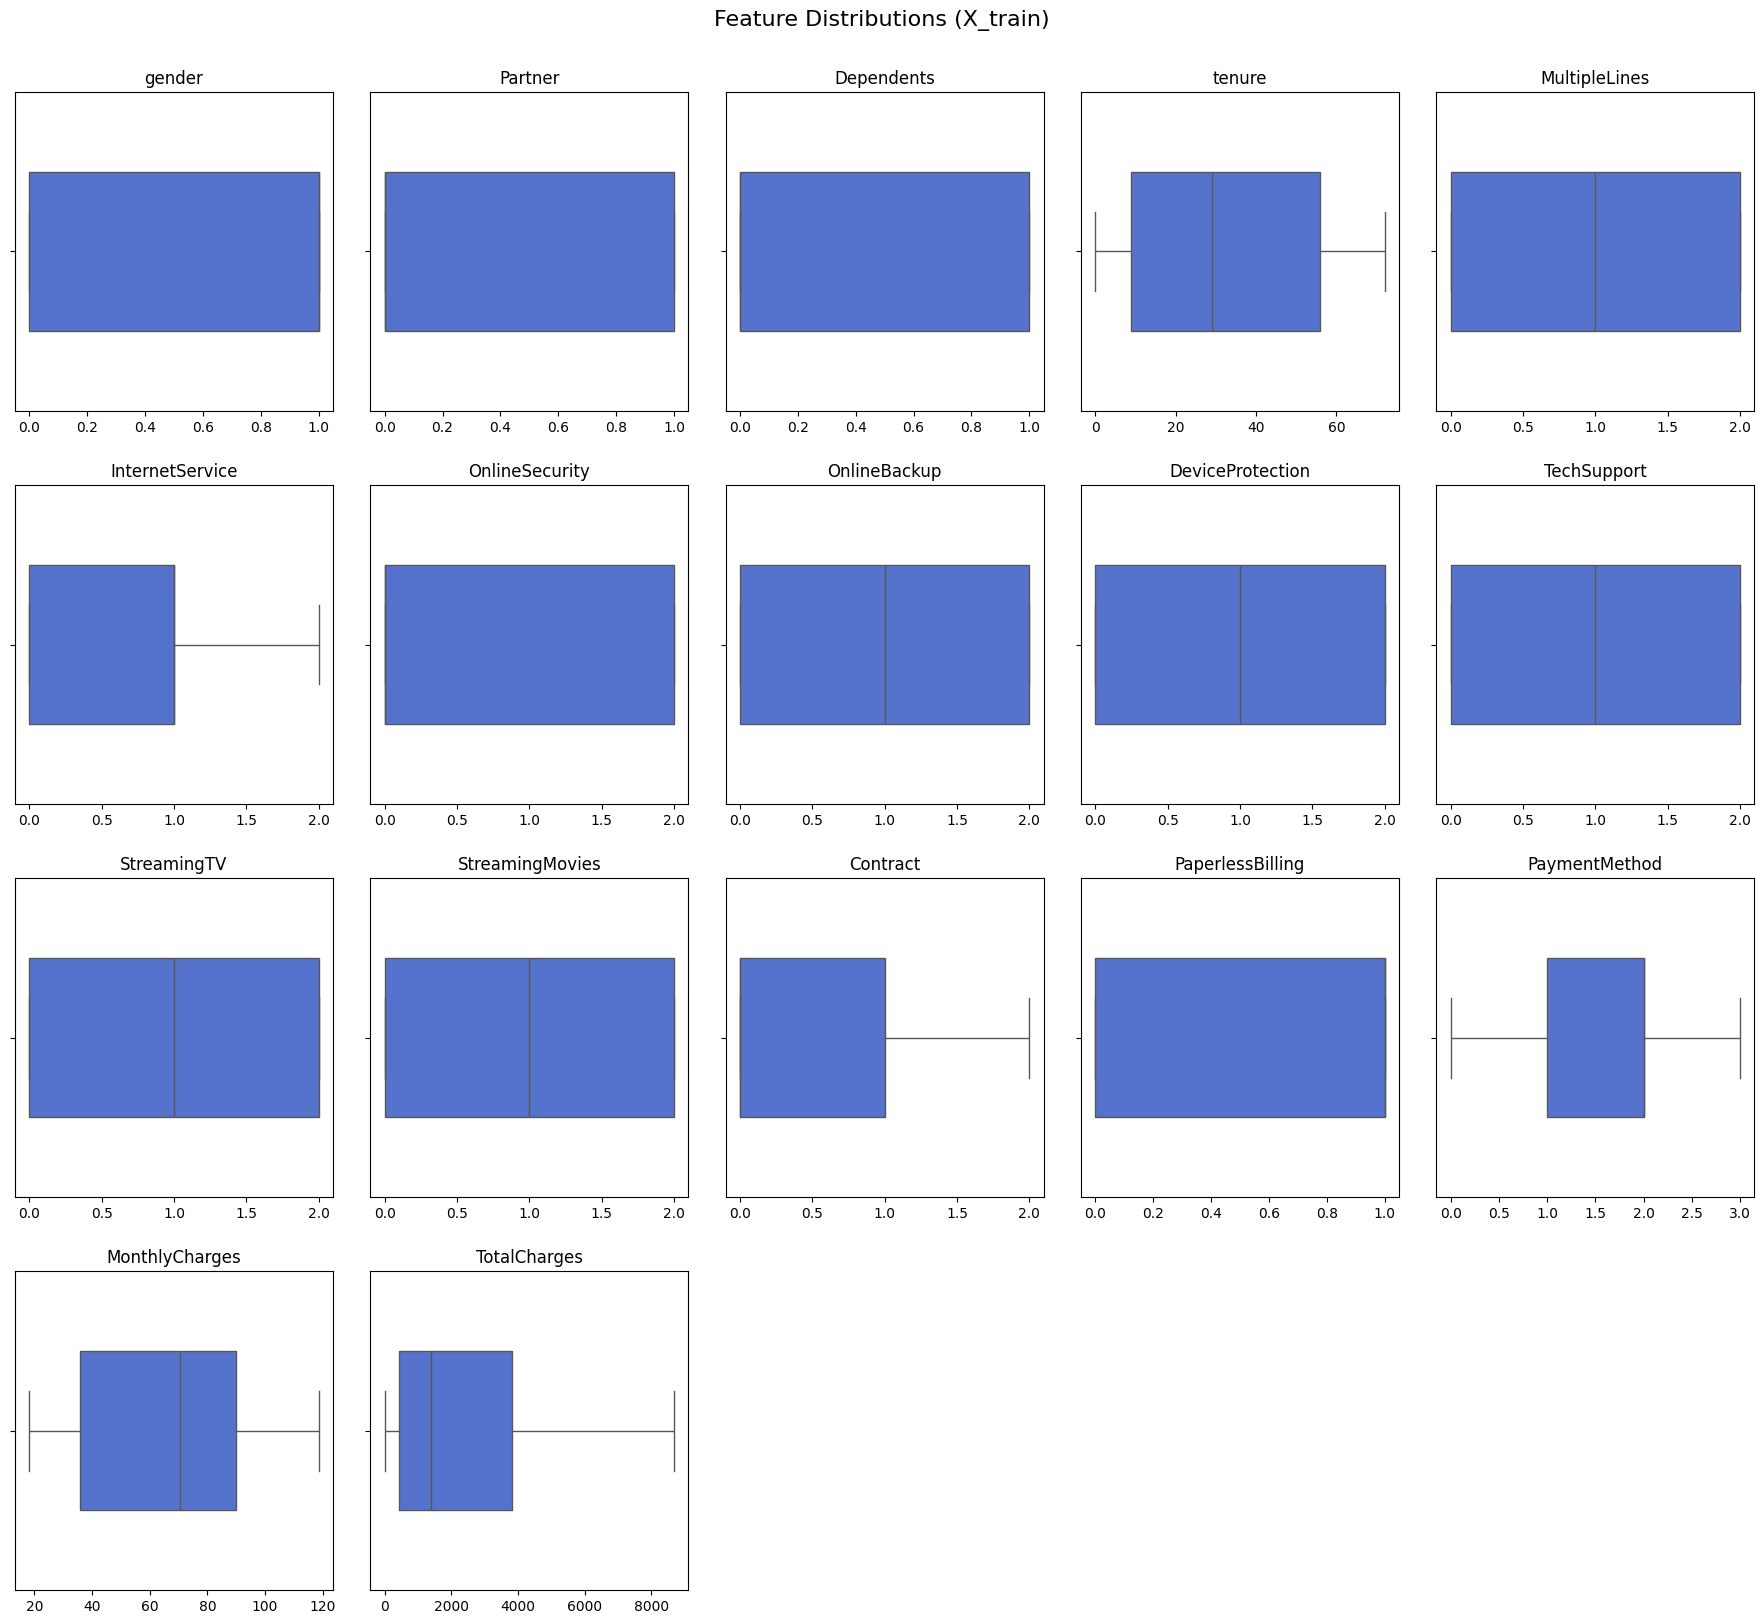

In [292]:
X_train_df = pd.DataFrame(X_train_sampled, columns=X_train.columns)  
n_cols = 5
n_rows = int(np.ceil(X_train_df.shape[1] / n_cols))
plt.figure(figsize=(18, 4*n_rows)) 

for i, column in enumerate(X_train_df.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=X_train_df[column], color='royalblue', width=0.5)
    plt.title(f'{column}', fontsize=12)
    plt.xlabel('')  
    
plt.tight_layout(pad=2.0)  
plt.suptitle('Feature Distributions (X_train)', y=1.02, fontsize=16)
plt.show()

In [293]:
left=[]
right=[]
extreme_right=[]
extreme_left=[]
symmetric=[]

for column in X_train_sampled.columns:
    skewness=X_train_sampled[column].skew()
    if skewness>1:
        extreme_right.append(column)  
    elif 1>skewness>0.5:
        right.append(column)
    elif -0.5<skewness<0.5:
        symmetric.append(column)
    elif -1>skewness>-0.5:
        left.append(column)
    elif skewness>-1:
        extreme_left.append(column)
        
print(f" extreme left skewed columns{extreme_left}")
print(f" extreme right skewed columns{extreme_right}")
print(f"left skewed columns{left}")
print(f"right skewed columns{right}")
print(f" symmetric columns{symmetric}")

    

 extreme left skewed columns[]
 extreme right skewed columns[]
left skewed columns[]
right skewed columns['Dependents', 'Contract', 'TotalCharges']
 symmetric columns['gender', 'Partner', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']


In [294]:
for i in right:
    print(f"{i} level of skewness {X_train_sampled[i].skew()}")

Dependents level of skewness 0.8755854876889326
Contract level of skewness 0.6087410289488119
TotalCharges level of skewness 0.9636814139592068


In [295]:
from scipy import stats

def describe_advanced(series):
    try:
        mode_result = stats.mode(series.dropna(), keepdims=True)
        mode_val = mode_result.mode[0] if mode_result.count[0] > 1 else None
    except:
        mode_val = None
    
    stats_dict = {
        'Mean': series.mean(),
        'Median': series.median(),
        'Mode': mode_val,
        'Mode_Count': mode_result.count[0] if 'mode_result' in locals() else None,
        'Std': series.std(),
        'Min': series.min(),
        '25%': series.quantile(0.25),
        '75%': series.quantile(0.75),
        'Max': series.max(),
        'IQR': series.quantile(0.75) - series.quantile(0.25),
        'Skewness': series.skew(),
        'Kurtosis': series.kurt(),
        'Missing': series.isna().sum()
    }
    
    return pd.Series(stats_dict)


In [296]:
describe_advanced(X_train_sampled["TotalCharges"])

Mean          2301.461693
Median        1398.600000
Mode             0.000000
Mode_Count       8.000000
Std           2278.228850
Min              0.000000
25%            418.275000
75%           3826.100000
Max           8684.800000
IQR           3407.825000
Skewness         0.963681
Kurtosis        -0.233908
Missing          0.000000
dtype: float64

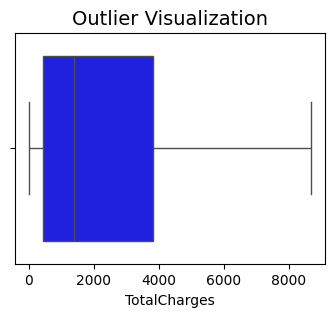

In [297]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=X_train_sampled['TotalCharges'], color='blue')
plt.title('Outlier Visualization', fontsize=14)
plt.show()

In [298]:
from scipy.stats import boxcox
X_train_sampled['TotalCharges'], _ = boxcox(X_train_sampled['TotalCharges'] + 1e-10)

print(f"New skewness: {X_train_sampled['TotalCharges'].skew():.2f}")

New skewness: -0.17


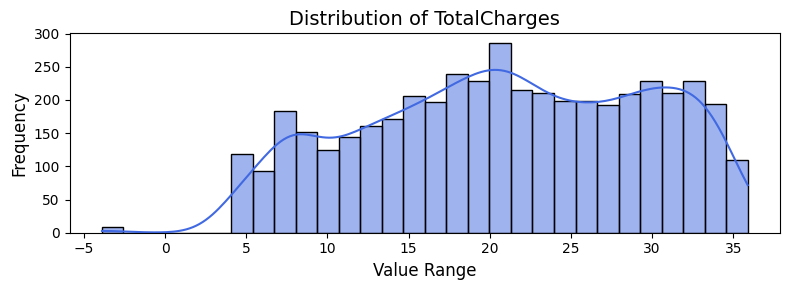

In [299]:
plt.figure(figsize=(8, 3))
sns.histplot(data=X_train_sampled, x="TotalCharges", kde=True, color='royalblue', bins=30)
plt.title('Distribution of TotalCharges', fontsize=14)
plt.xlabel('Value Range', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

In [300]:
binary_columns = list(set(binary_columns) - {"Churn"})

C:\Users\Dareen\AppData\Local\Temp\ipykernel_34116\671326611.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Dareen\AppData\Local\Temp\ipykernel_34116\671326611.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Dareen\AppData\Local\Temp\ipykernel_34116\671326611.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Dareen\AppData\Local\Temp\ipykernel_34116\671326611.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

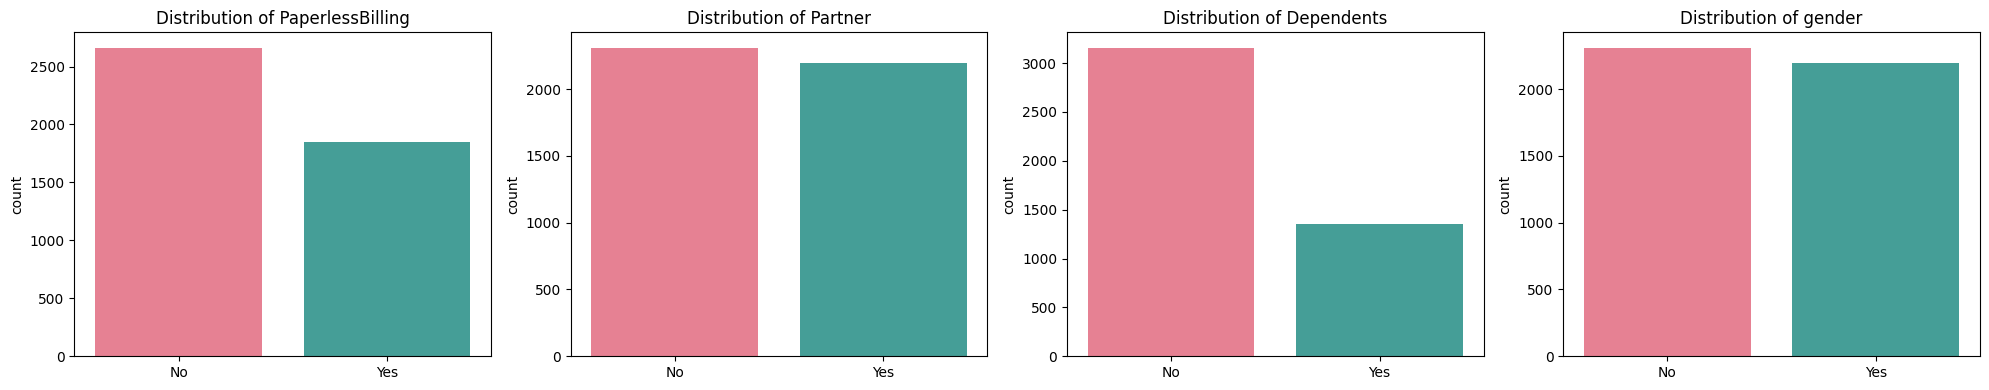

In [301]:
n_cols = len(binary_columns)  
n_rows = 1
plt.figure(figsize=(5 * n_cols, 4 * n_rows))  
palette = sns.color_palette("husl", 2) 

for i, col in enumerate(binary_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(
        data=X_train_sampled, 
        x=col, 
        palette=palette,  
        order=X_train_sampled[col].value_counts().index  
    )
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel('')
    plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  

plt.tight_layout()
plt.show()

C:\Users\Dareen\AppData\Local\Temp\ipykernel_34116\1003302414.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


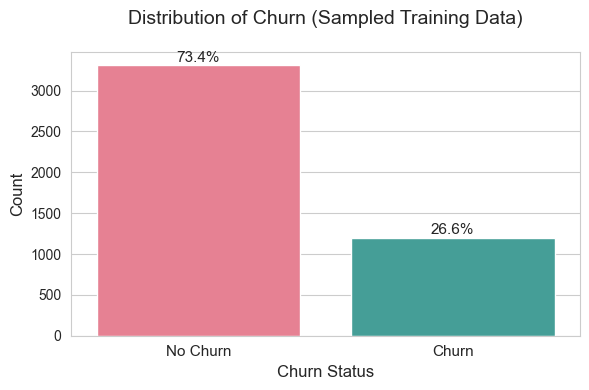

In [305]:
sns.set_style("whitegrid")
palette = sns.color_palette("husl", 2)  # 

plt.figure(figsize=(6, 4))
ax = sns.countplot(
    x=y_train_sampled,  
    palette=palette,
    order=[0, 1] 
)

plt.title('Distribution of Churn (Sampled Training Data)', fontsize=14, pad=20)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'], fontsize=11)

total = len(y_train_sampled)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2., 
        height + 0.01 * total, 
        f'{height/total:.1%}', 
        ha='center', 
        fontsize=11
    )

plt.tight_layout()
plt.show()

In [306]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
pipeline = Pipeline([
    ('oversample', SMOTE(sampling_strategy=0.5)), 
    ('undersample', RandomUnderSampler(sampling_strategy=0.8))  
])

X_train_fixed, y_train_fixed = pipeline.fit_resample(X_train_sampled, y_train_sampled)

print(pd.Series(y_train_fixed).value_counts(normalize=True))

Churn
0    0.555466
1    0.444534
Name: proportion, dtype: float64


C:\Users\Dareen\AppData\Local\Temp\ipykernel_34116\1129715275.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


([<matplotlib.axis.XTick at 0x1bdb8a9e340>,
 [Text(0, 0, 'No Churn'), Text(1, 0, 'Churn')])

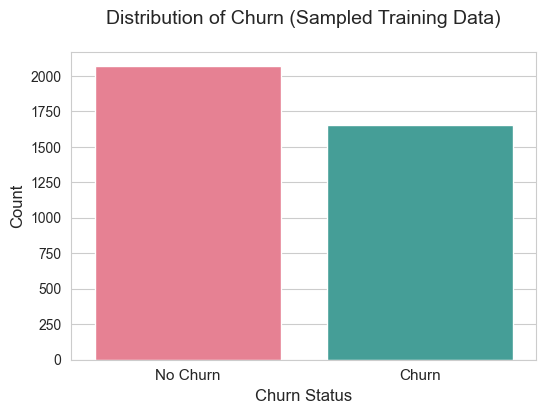

In [307]:
sns.set_style("whitegrid")
palette = sns.color_palette("husl", 2)  # 

plt.figure(figsize=(6, 4))
ax = sns.countplot(
    x=y_train_fixed,  
    palette=palette,
    order=[0, 1] 
)

plt.title('Distribution of Churn (Sampled Training Data)', fontsize=14, pad=20)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'], fontsize=11)

In [308]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', random_state=42)

In [310]:
model.fit(X_train_fixed,y_train_fixed)

c:\Users\Dareen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=42)

              precision    recall  f1-score   support

    No Churn       0.74      1.00      0.85      1036
       Churn       0.00      0.00      0.00       373

    accuracy                           0.73      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.73      0.62      1409



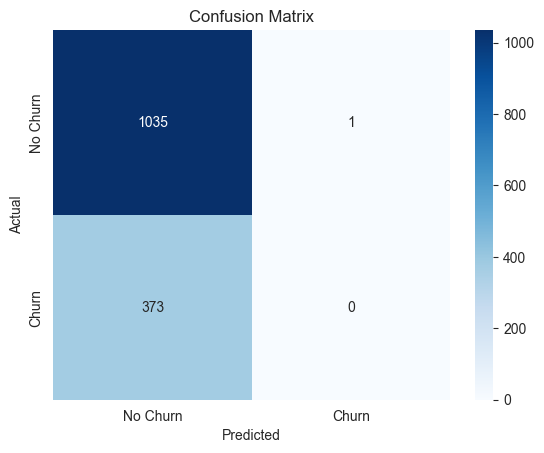

In [312]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [313]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(is_unbalance=True, boosting_type='gbdt')

In [314]:
lgbm.fit(X_train_fixed,y_train_fixed)

[LightGBM] [Info] Number of positive: 1655, number of negative: 2068
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 622
[LightGBM] [Info] Number of data points in the train set: 3723, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444534 -> initscore=-0.222781
[LightGBM] [Info] Start training from score -0.222781


LGBMClassifier(is_unbalance=True)

              precision    recall  f1-score   support

    No Churn       0.92      0.63      0.75      1036
       Churn       0.46      0.86      0.60       373

    accuracy                           0.69      1409
   macro avg       0.69      0.74      0.67      1409
weighted avg       0.80      0.69      0.71      1409



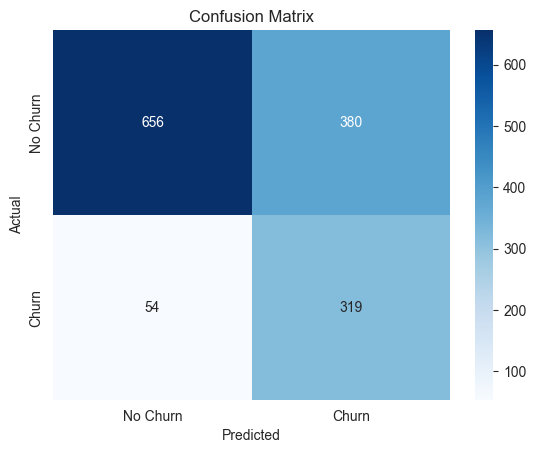

In [315]:
y_pred2 = lgbm.predict(X_test)
print(classification_report(y_test, y_pred2, target_names=['No Churn', 'Churn']))

conf_matrix = confusion_matrix(y_test, y_pred2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [316]:
from sklearn.svm import SVC
svm = SVC(class_weight='balanced', probability=True)

In [317]:
svm.fit(X_train_fixed,y_train_fixed)

SVC(class_weight='balanced', probability=True)

              precision    recall  f1-score   support

    No Churn       0.76      0.99      0.86      1036
       Churn       0.86      0.13      0.22       373

    accuracy                           0.76      1409
   macro avg       0.81      0.56      0.54      1409
weighted avg       0.79      0.76      0.69      1409



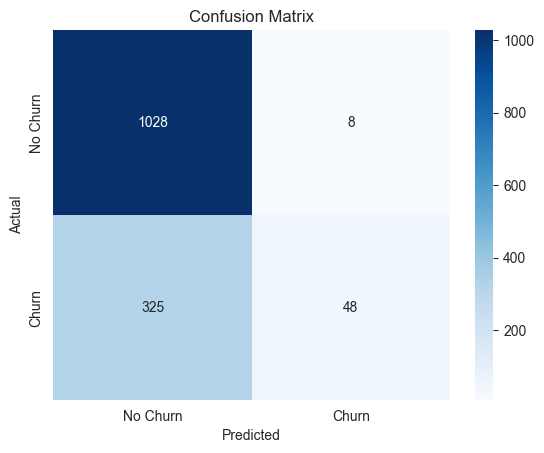

In [318]:
y_pred3 = svm.predict(X_test)
print(classification_report(y_test, y_pred3, target_names=['No Churn', 'Churn']))

conf_matrix = confusion_matrix(y_test, y_pred3)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

models = {
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__class_weight': ['balanced', None]
        },
        'preprocessor': StandardScaler() 
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10]
        },
        'preprocessor': None 
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42, eval_metric='logloss'),
        'params': {
            'classifier__scale_pos_weight': [1, (y_train_fixed == 0).sum() / (y_train_fixed == 1).sum()],  
            'classifier__max_depth': [3, 6]
        },
        'preprocessor': None
    }
}

In [320]:
from sklearn.model_selection import GridSearchCV

pipelines = {}

for name, config in models.items():
    steps = []
    if config['preprocessor']:
        steps.append(('scaler', config['preprocessor']))
    steps.append(('classifier', config['model']))
    
    pipelines[name] = Pipeline(steps)

In [322]:
results = {}

for name, pipeline in pipelines.items():
    print(f"Grid search for {name}...")
    grid = GridSearchCV(
        pipeline,
        param_grid=models[name]['params'],
        cv=5, 
        scoring='roc_auc', 
        n_jobs=-1  
    )
    grid.fit(X_train_fixed, y_train_fixed)
    results[name] = {
        'best_model': grid.best_estimator_,
        'best_params': grid.best_params_,
        'best_score': grid.best_score_
    }
    print(f"Best ROC-AUC for {name}: {grid.best_score_:.3f}")

Grid search for LogisticRegression...
Best ROC-AUC for LogisticRegression: 0.840
Grid search for RandomForest...
Best ROC-AUC for RandomForest: 0.862
Grid search for XGBoost...
Best ROC-AUC for XGBoost: 0.849


In [323]:
from sklearn.metrics import roc_auc_score

final_scores = {}

for name, result in results.items():
    y_pred_proba = result['best_model'].predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    final_scores[name] = auc
    print(f"{name} Test ROC-AUC: {auc:.3f}")
    
best_model_name = max(final_scores, key=final_scores.get)
best_model = results[best_model_name]['best_model']
print(f"\nBest model: {best_model_name} (ROC-AUC = {final_scores[best_model_name]:.3f})")

LogisticRegression Test ROC-AUC: 0.668
RandomForest Test ROC-AUC: 0.830
XGBoost Test ROC-AUC: 0.788

Best model: RandomForest (ROC-AUC = 0.830)
